In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import langevin_cached_model as lcm
import pymc3 as pm
import scipy.io

In [39]:
oxy_data37=scipy.io.loadmat('OXY37_MRI_1_ts.mat')

mean:  -1.13130760798e-12
var:  371.985450742
N:  736


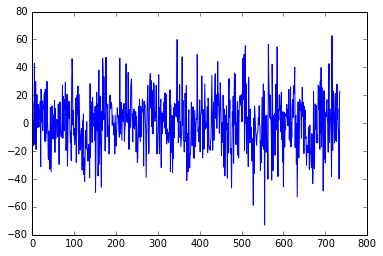

In [40]:
mpfc_r_ts=oxy_data37['mpfc_r_ts']
plt.plot(mpfc_r_ts[0])
print("mean: ",mpfc_r_ts[0].mean())
print("var: ",mpfc_r_ts[0].std()**2)
N=len(mpfc_r_ts[0])
print("N: ",N)

In [41]:
# initial prior
# both D and A have mean 1 and std 10
alpha_A=400.0/16.0
beta_A=1.0/16.0
alpha_D=2.0+1.0/1.6
beta_D=100*(alpha_D-1)
delta_t=0.802

In [42]:
# compile model for reuse
sm = lcm.LangevinIG()
sm.samples=10000

In [43]:
trace = sm.run(x=mpfc_r_ts[0],
                aD=alpha_D,
                bD=beta_D,
                aA=alpha_A,
                bA=beta_A,
                delta_t=delta_t,
                N=N)

Applied log-transform to D and added transformed D_log to model.
Applied log-transform to A and added transformed A_log to model.
 [-----------------100%-----------------] 10000 of 10000 complete in 6.8 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15fc45518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15e41c6a0>]], dtype=object)

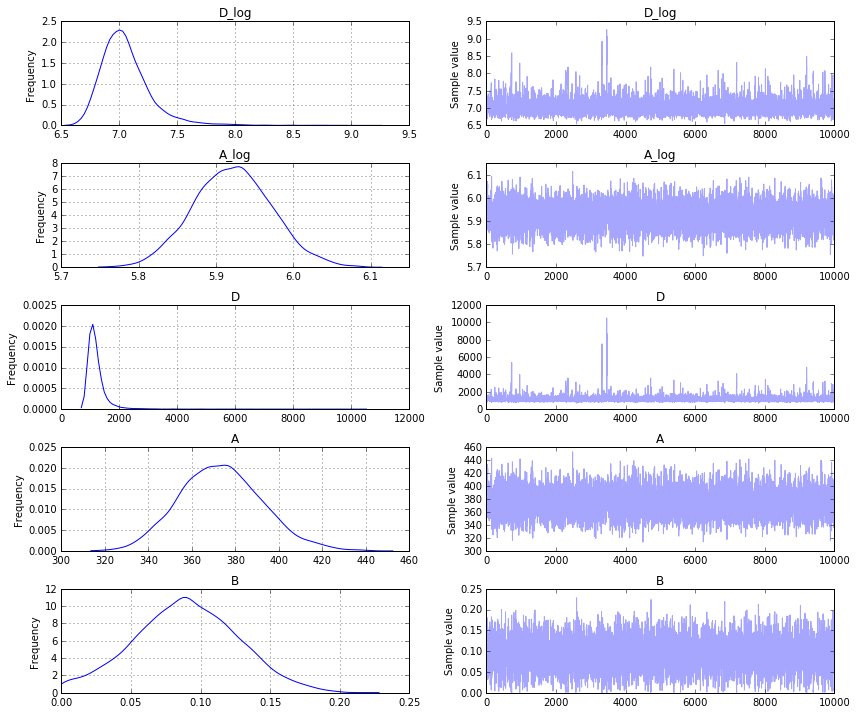

In [44]:
pm.traceplot(trace)

In [45]:
pm.summary(trace)


D_log:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.056            0.226            0.005            [6.687, 7.481]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  6.739          6.913          7.023          7.153          7.595


A_log:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.922            0.051            0.001            [5.817, 6.017]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  5.824          5.887          5.921          5.955          6.025


D:

  Mean             SD               MC Error         95% HPD interval
  -----------------------------

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
